# Time series-2

In [1]:
#librares required for time series data
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [4]:
df=pdr.get_data_yahoo('MSFT')

In [9]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-03-11,289.510010,279.429993,287.959991,280.070007,27192600.0,280.070007
2022-03-14,285.399994,275.820007,280.339996,276.440002,30660700.0,276.440002
2022-03-15,287.820007,278.730011,280.350006,287.149994,34245100.0,287.149994
2022-03-16,294.570007,283.200012,289.109985,294.390015,37781300.0,294.390015
2022-03-16,294.570007,283.200012,289.109985,294.390015,37716774.0,294.390015


In [ ]:
#SMA(simple moving average)  rolling fucntion windows size is used for how many SMA

<AxesSubplot:xlabel='Date'>

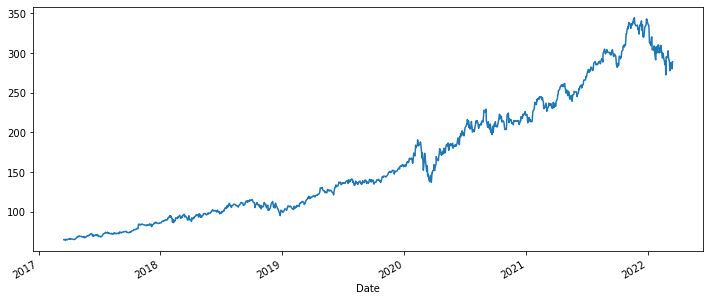

In [11]:
df['Open'].plot(figsize=(12,5))

In [15]:
df['10Open']=df['Open'].rolling(window=10,min_periods=1).mean()

<AxesSubplot:xlabel='Date'>

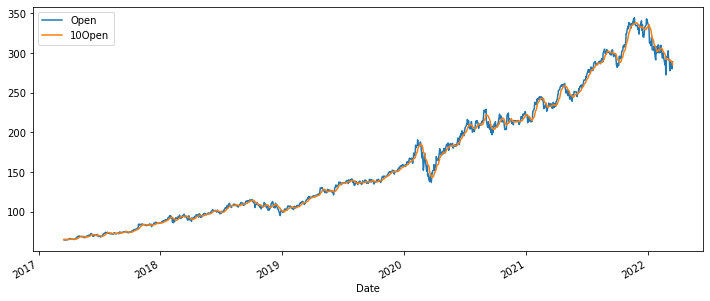

In [16]:
df[['Open','10Open']].plot(figsize=(12,5))

<AxesSubplot:xlabel='Date'>

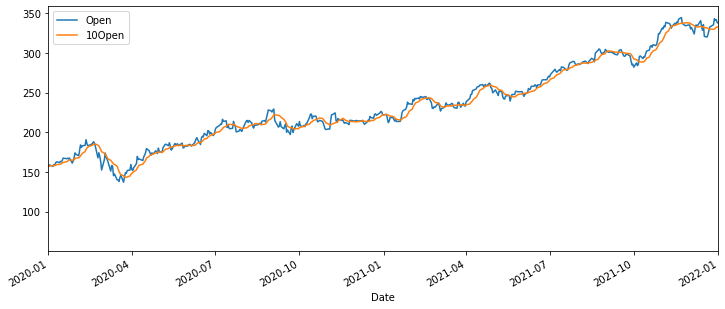

In [23]:
df[['Open','10Open']].plot(xlim=['2020-01-01','2022-1-01'],figsize=(12,5))

In [24]:
df['30Open']=df['Open'].rolling(window=30,min_periods=1).mean()
df['60Open']=df['Open'].rolling(window=60,min_periods=1).mean()

<AxesSubplot:xlabel='Date'>

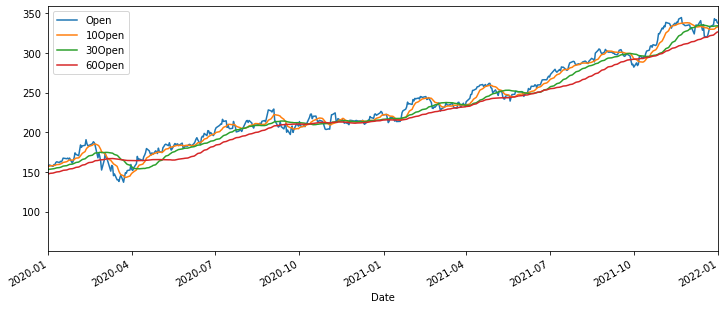

In [25]:
df[['Open','10Open','30Open','60Open']].plot(xlim=['2020-01-01','2022-1-01'],figsize=(12,5))

<AxesSubplot:xlabel='Date'>

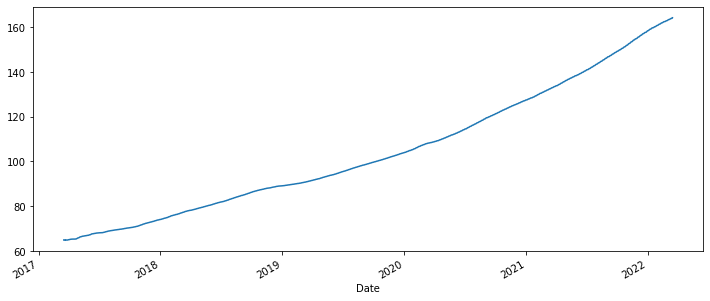

In [27]:
#expanding for CMA
df['Open'].expanding().mean().plot(figsize=(12,5))

<AxesSubplot:xlabel='Date'>

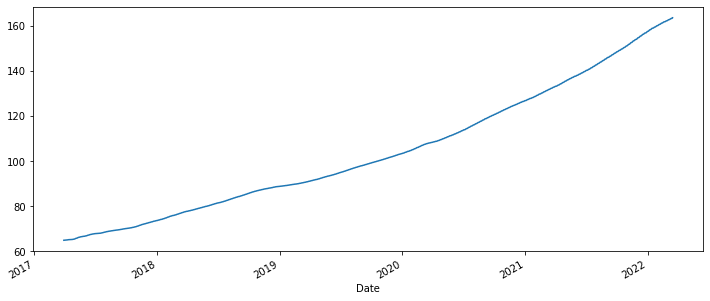

In [28]:
df['10Open'].expanding(10).mean().plot(figsize=(12,5))

<AxesSubplot:xlabel='Date'>

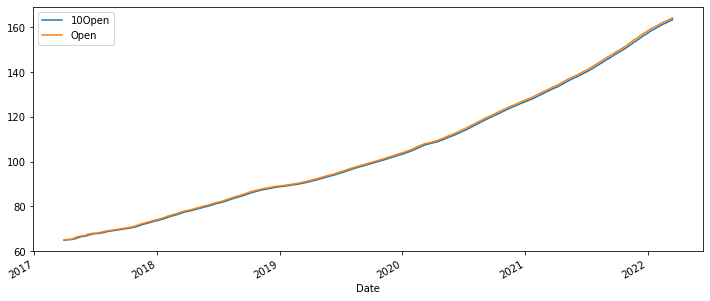

In [29]:
df[['10Open','Open']].expanding(10).mean().plot(figsize=(12,5))

In [30]:
#EWMA(exponential weighted moving avaerage)

In [31]:
#EMWA=a*x(t)+(1-a)*EMWA(t-1)

In [32]:
#lets smootthing factor =0.1

In [33]:
df['EMA_0.1']=df['Open'].ewm(alpha=0.1, adjust=False).mean()

<AxesSubplot:xlabel='Date'>

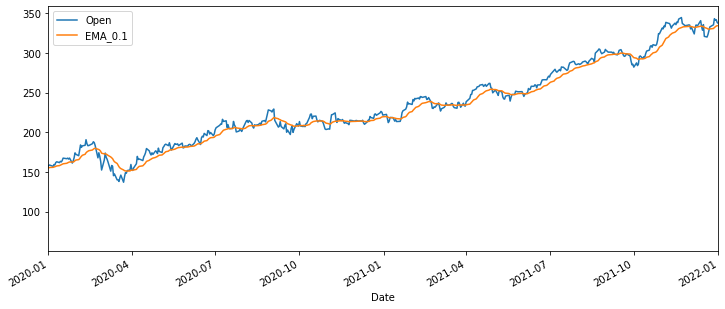

In [34]:
df[['Open','EMA_0.1']].plot(xlim=['2020-01-01','2022-1-01'],figsize=(12,5))

In [35]:
#EWMA better than SMA

In [36]:
df['EMA_0.3']=df['Open'].ewm(alpha=0.3, adjust=False).mean()

<AxesSubplot:xlabel='Date'>

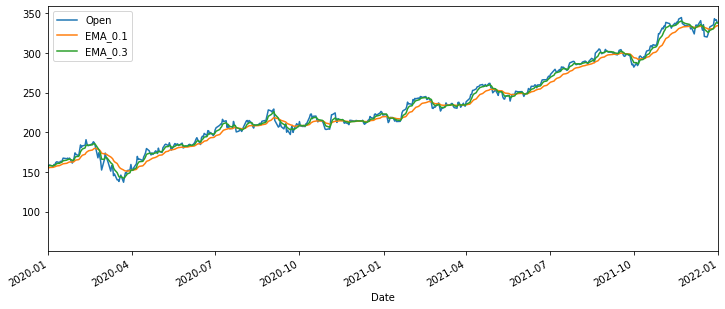

In [38]:
df[['Open','EMA_0.1','EMA_0.3']].plot(xlim=['2020-01-01','2022-1-01'],figsize=(12,5))

In [40]:
#ewma can be get through span

In [41]:
df['EWMA5']=df['Open'].ewm(span=5).mean()

In [43]:
df['EWMA20']=df['Open'].ewm(span=20).mean()

In [45]:
df['EWMA60']=df['Open'].ewm(span=60).mean()

<AxesSubplot:xlabel='Date'>

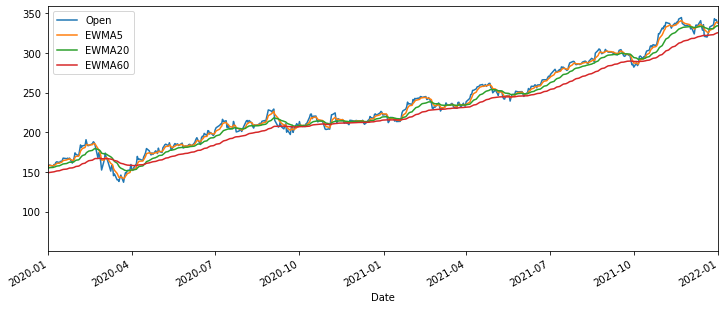

In [46]:
df[['Open','EWMA5','EWMA20','EWMA60']].plot(xlim=['2020-01-01','2022-1-01'],figsize=(12,5))

# ARIMA

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd
%matplotlib inline

In [56]:
df_airline=pd.read_csv('G:/AirPassengers.csv')

In [57]:
df_airline

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [58]:
df_airline.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [59]:
#no null values 

In [60]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [64]:
#we have to ocnvert the obj into date time

In [62]:
df_airline['Month']=pd.to_datetime(df_airline['Month'])

In [63]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [65]:
df_airline.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [66]:
#now we need to set month as index

In [67]:
df_airline.set_index('Month',inplace=True)

In [68]:
df_airline.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='Month'>

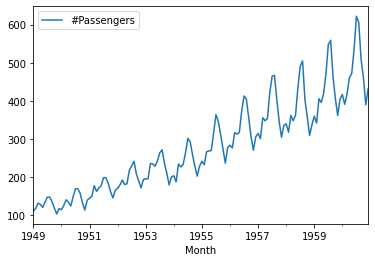

In [69]:
df_airline.plot()

In [71]:
#from above graph we can say seasonal graph so its not a stationary data

In [73]:
#dicky fuller test test
from statsmodels.tsa.stattools import adfuller

In [74]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [75]:
adf_test(df_airline['#Passengers'])

ADF Statistics: 0.8153688792060482
p- value: 0.991880243437641
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [76]:
#from above we conclude that its seasonal data

In [77]:
#we need to make data stationary

In [78]:
#first difference

In [81]:
## Use Techniques Differencing
df_airline['#Passengers First Difference']=df_airline['#Passengers']-df_airline['#Passengers'].shift(1)

In [82]:
df_airline.head()

,#Passengers,#Passengers First Difference
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


In [83]:
adf_test(df_airline['#Passengers First Difference'].dropna())

ADF Statistics: -2.8292668241699994
p- value: 0.0542132902838255
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [85]:
#dropna used since we have drop nan values in first diffrence column

In [86]:
df_airline['#Passengers second Difference']=df_airline['#Passengers First Difference']-df_airline['#Passengers First Difference'].shift(2)

In [88]:
adf_test(df_airline['#Passengers second Difference'].dropna())

ADF Statistics: -15.834423365324904
p- value: 9.857018894070188e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [89]:
#now we got statiobary data and d=2

In [90]:
#for seasonal data we have to make 12 months

In [91]:
df_airline['#Passengers 12 Difference']=df_airline['#Passengers']-df_airline['#Passengers'].shift(12)

In [93]:
adf_test(df_airline['#Passengers 12 Difference'].dropna())

ADF Statistics: -3.383020726492481
p- value: 0.011551493085514952
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [94]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

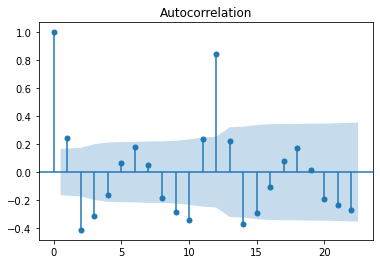

In [96]:
acf = plot_acf(df_airline["#Passengers second Difference"].dropna())

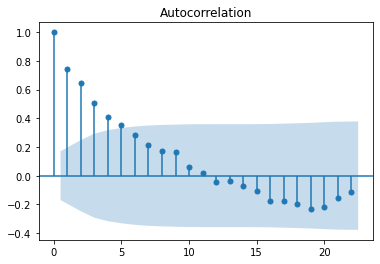

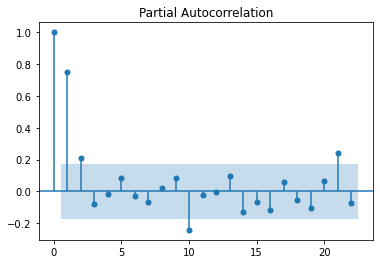

In [98]:
acf12 = plot_acf(df_airline["#Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["#Passengers 12 Difference"].dropna())

C:\Users\GOPINATH V GOWDA\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


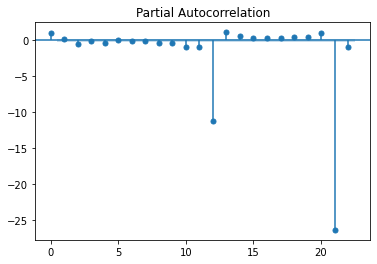

In [104]:
rf=plot_pacf(df_airline["#Passengers second Difference"].dropna())

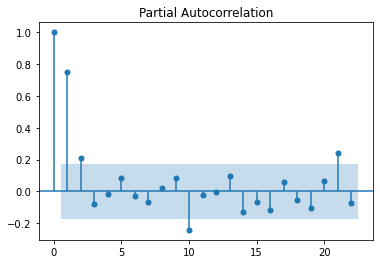

In [102]:
pacf12 = plot_pacf(df_airline["#Passengers 12 Difference"].dropna())

In [105]:
### split train and test data
df_airline

,#Passengers,#Passengers First Difference,#Passengers second Difference,#Passengers 12 Difference
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,NaN,NaN
1949-04-01,129,-3.0,-9.0,NaN
1949-05-01,121,-8.0,-22.0,NaN
...,...,...,...,...
1960-08-01,606,-16.0,-79.0,47.0
1960-09-01,508,-98.0,-185.0,45.0
1960-10-01,461,-47.0,-31.0,54.0


In [106]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [152]:
train_data=df_airline[:train_dataset_end]
test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [153]:
train_data.shape

(84, 4)

In [154]:
test_data.shape

(60, 4)

In [108]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [110]:
pred_start_date

Timestamp('1956-01-01 00:00:00')

In [111]:
pred_end_date

Timestamp('1960-12-01 00:00:00')

In [109]:
## create a ARIMA model
from statsmodels.tsa.arima_model import ARIMA

In [116]:
#order(p d r)
model_ARIMA=ARIMA(train_data['#Passengers'],order=(10,2,0))

C:\Users\GOPINATH V GOWDA\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\GOPINATH V GOWDA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so in

In [117]:
model_Arima_fit=model_ARIMA.fit()

In [119]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D2.#Passengers   No. Observations:                   82
Model:                ARIMA(10, 2, 0)   Log Likelihood                -357.239
Method:                       css-mle   S.D. of innovations             18.333
Date:                Thu, 17 Mar 2022   AIC                            738.477
Time:                        21:21:29   BIC                            767.358
Sample:                    03-01-1949   HQIC                           750.072
                         - 12-01-1955                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0164      0.347      0.047      0.962      -0.665       0.697
ar.L1.D2.#Passengers     -0.5165      0.097     -5.300      0.000      -0.707      -0.325
ar.L2.D2.#Passengers     -0.7203      0.108     -6.650      0.000      -0.933      -0.508
ar.L3.D2.#Passengers     -0.4856      0.120     -4.032      0.000      -0.722      -0.250
ar.L4.D2.#Passengers     -0.7506      0.131     -5.717      0.000      -1.008      -0.493
ar.L5.D2.#Passengers     -0.5065      0.151     -3.360      0.001      -0.802      -0.211
ar.L6.D2.#Passengers     -0.5204      0.149     -3.500      0.000      -0.812      -0.229
ar.L7.D2.#Passengers     -0.3055      0.136     -2.250      0.024      -0.572      -0.039
ar.L8.D2.#Passengers     -0.5943      0.125     -4.744      0.000      -0.840      -0.349
ar.L9.D2.#Passengers     -0.2966      0.116     -2.556      0.011      -0.524      -0.069
ar.L10.D2.#Passengers    -0.4826      0.101     -4.765      0.000      -0.681      -0.284
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             0.9098           -0.5670j            1.0720           -0.0887
AR.2             0.9098           +0.5670j            1.0720            0.0887
AR.3             0.4844           -0.9210j            1.0406           -0.1729
AR.4             0.4844           +0.9210j            1.0406            0.1729
AR.5            -0.9676           -0.4146j            1.0527           -0.4356
AR.6            -0.9676           +0.4146j            1.0527            0.4356
AR.7            -0.6004           -0.8889j            1.0726           -0.3445
AR.8            -0.6004           +0.8889j            1.0726            0.3445
AR.9            -0.1335           -1.1349j            1.1427           -0.2686
AR.10           -0.1335           +1.1349j            1.1427            0.2686
------------------------------------------------------------------------------
"""

In [134]:
model_ARIMA=ARIMA(train_data['#Passengers'],order=(0,2,0))

C:\Users\GOPINATH V GOWDA\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\GOPINATH V GOWDA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so in

In [135]:
model_Arima_fit=model_ARIMA.fit()
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D2.#Passengers   No. Observations:                   82
Model:                 ARIMA(0, 2, 0)   Log Likelihood                -385.782
Method:                           css   S.D. of innovations             26.728
Date:                Thu, 17 Mar 2022   AIC                            775.563
Time:                        21:28:28   BIC                            780.377
Sample:                    03-01-1949   HQIC                           777.496
                         - 12-01-1955                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4268      2.952      0.145      0.885      -5.358       6.212
==============================================================================
"""

In [120]:
#coef  are less than p<.05 

In [137]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [140]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['#Passengers']-pred

UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('float64') to dtype('int64') with casting rule 'same_kind'

In [124]:
residuals

Month
1956-01-01    302.695977
1956-02-01    289.830789
1956-03-01    319.329677
1956-04-01    328.562148
1956-05-01    298.689310
1956-06-01    354.352112
1956-07-01    426.271448
1956-08-01    441.529643
1956-09-01    350.001334
1956-10-01    315.913207
1956-11-01    242.711501
1956-12-01    281.647815
1957-01-01    333.119960
1957-02-01    304.741458
1957-03-01    367.652381
1957-04-01    343.198126
1957-05-01    343.325770
1957-06-01    413.019358
1957-07-01    483.932093
1957-08-01    477.557322
1957-09-01    403.265260
1957-10-01    346.226366
1957-11-01    281.802360
1957-12-01    337.112086
1958-01-01    347.244782
1958-02-01    325.413859
1958-03-01    364.318071
1958-04-01    341.830106
1958-05-01    355.290691
1958-06-01    435.056478
1958-07-01    504.184598
1958-08-01    505.771334
1958-09-01    405.976035
1958-10-01    350.193225
1958-11-01    301.548571
1958-12-01    341.117852
1959-01-01    364.677792
1959-02-01    347.031467
1959-03-01    403.339716
1959-04-01    392.1

<AxesSubplot:ylabel='Density'>

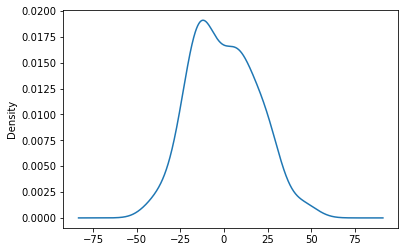

In [125]:
model_Arima_fit.resid.plot(kind='kde')

In [126]:
test_data['Predicted_ARIMA']=pred

C:\Users\GOPINA~1\AppData\Local\Temp/ipykernel_6672/95659616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<AxesSubplot:xlabel='Month'>

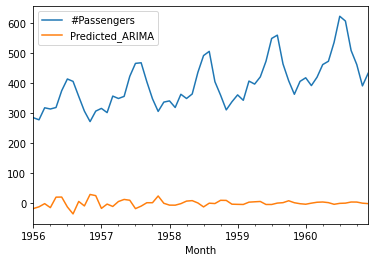

In [128]:
test_data[['#Passengers','Predicted_ARIMA']].plot()

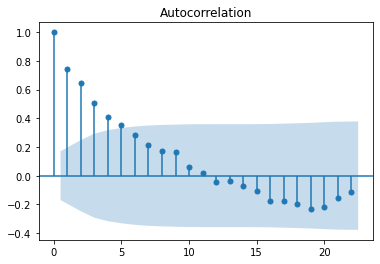

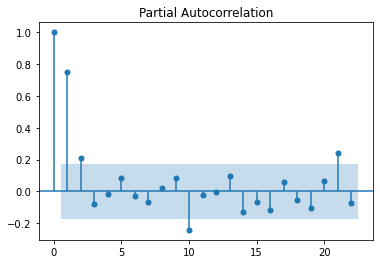

In [129]:
acf12 = plot_acf(df_airline["#Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["#Passengers 12 Difference"].dropna())

In [139]:
#since its seasonal data we are not getting good results so we go with SARIMAX

# create a SARIMA model


In [141]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [142]:
model_SARIMA=SARIMAX(train_data['#Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))

C:\Users\GOPINATH V GOWDA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\GOPINATH V GOWDA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [143]:
model_SARIMA_fit=model_SARIMA.fit()

C:\Users\GOPINATH V GOWDA\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [144]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                         #Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.241
Date:                             Thu, 17 Mar 2022   AIC                            548.481
Time:                                     21:29:53   BIC                            568.971
Sample:                                 01-01-1949   HQIC                           556.638
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5991      0.938      0.639      0.523      -1.239       2.437
ar.L2          0.8312      0.232      3.579      0.000       0.376       1.286
ar.L3         -0.4533      0.894     -0.507      0.612      -2.205       1.299
ma.L1          0.1830      1.165      0.157      0.875      -2.101       2.466
ma.L2         -0.5349      1.263     -0.423      0.672      -3.011       1.941
ma.L3         -0.0985      0.384     -0.256      0.798      -0.852       0.655
ma.L4         -0.1271      0.338     -0.377      0.706      -0.789       0.534
ma.L5          0.2472      0.357      0.693      0.488      -0.452       0.947
sigma2        87.7264     81.195      1.080      0.280     -71.414     246.866
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [145]:
test_data.tail()

,#Passengers,#Passengers First Difference,#Passengers second Difference,#Passengers 12 Difference,Predicted_ARIMA
Month,,,,,
1960-08-01,606,-16.0,-79.0,47.0,-0.615666
1960-09-01,508,-98.0,-185.0,45.0,3.106049
1960-10-01,461,-47.0,-31.0,54.0,2.964128
1960-11-01,390,-71.0,27.0,28.0,-0.732256
1960-12-01,432,42.0,89.0,27.0,-2.251369


In [146]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [147]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['#Passengers']-pred_Sarima

C:\Users\GOPINATH V GOWDA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


<AxesSubplot:xlabel='Month'>

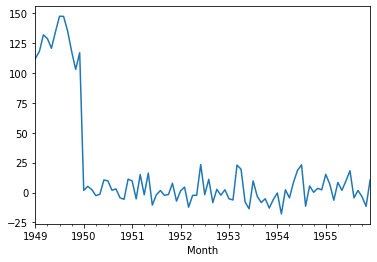

In [148]:
model_SARIMA_fit.resid.plot()

<AxesSubplot:ylabel='Density'>

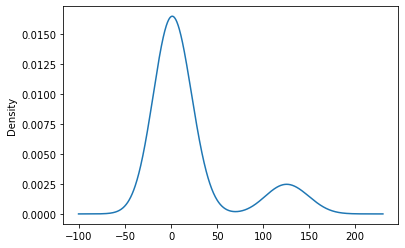

In [149]:
model_SARIMA_fit.resid.plot(kind='kde')

In [150]:
test_data['Predicted_SARIMA']=pred_Sarima

C:\Users\GOPINA~1\AppData\Local\Temp/ipykernel_6672/1367177785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


<AxesSubplot:xlabel='Month'>

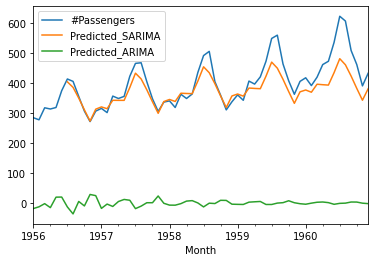

In [151]:
test_data[['#Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()